In [1]:
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

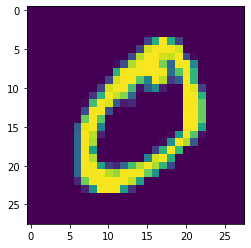

In [7]:
plt.imshow(X_train[1])

In [8]:
X_train=X_train/255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
from keras import Sequential #create cnn
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [11]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax')) #binary-sigmoid, regression-linear, multiple function- softmax

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

conv2d_1: Initial Image Size (28,28,1) we used 32 filters of (3,3) (28,28,1)---->(32,3,3)----->(26,26,64)[Output shape]
reason:{1 filter is convolving over (28,28,1)img and thus we get (26,26,64)} CALCULATION: i)Output Shape: (28-3)+1=26 ii)Trainable Parameter: 6433+64(this 64 is the Bias)=640 max_pooling2d_1:
When we will go to maxpooling then it will make the half of conv2d as we use(2,2) so the output shape-->(13,13,64) Maxpooling will not generate any trainable parameters as it does not learn anything conv2d_2:
(13,13,64)---->(3,3,64)---->(11,11,64) CALCULATION: Trainable Parameter: 643364+64=36928 max_pooling2d_2:
next again maxpooling so it will again make half(5,5,64) flatten_1:
Next flatten means this layer make the one dimentional--->(5564)=1600 dense_1: trainable parameters: flatten-1 dense_1 + dense_1------>(1600128)+128=204928 dense_2: trainable parameters: dense_1 dense_2 +dense_2------>(128*10)+10=1290

In [13]:

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:

X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [15]:
model.fit(X_train,y_train,epochs=10,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 168s 3ms/step - loss: 0.1321 - accuracy: 0.9596 - val_loss: 0.0545 - val_accuracy: 0.9843
Epoch 2/10
54000/54000 [==============================] - 162s 3ms/step - loss: 0.0433 - accuracy: 0.9861 - val_loss: 0.0471 - val_accuracy: 0.9875
Epoch 3/10
54000/54000 [==============================] - 163s 3ms/step - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.0351 - val_accuracy: 0.9907
Epoch 4/10
54000/54000 [==============================] - 165s 3ms/step - loss: 0.0216 - accuracy: 0.9932 - val_loss: 0.0345 - val_accuracy: 0.9917
Epoch 5/10
54000/54000 [==============================] - 175s 3ms/step - loss: 0.0153 - accuracy: 0.9947 - val_loss: 0.0497 - val_accuracy: 0.9873
Epoch 6/10
54000/54000 [==============================] - 171s 3ms/step - loss: 0.0122 - accuracy: 0.9957 - val_loss: 0.0326 - val_accuracy: 0.9908
Epoch 7/10
54000/54000 [==============================] - 175s 